## Setup: Working with the Database

**Install and import the required libraries**
#### Step 1: Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
### Task 1: Exploring Relationships with Scatter Plots

#### 1. Scatter Plot for Age vs. Job Satisfaction

Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.

#### 2. Scatter Plot for Compensation vs. Job Satisfaction
Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.
### Task 2: Enhancing Scatter Plots
#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction

Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.
#### 2. Scatter Plot for Age vs. Work Experience
Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.
### Task 3: Combining Scatter Plots with Additional Features
#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size

Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.
#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction
Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.
### Task 4: Scatter Plot Comparisons Across Groups
#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type
Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.
#### 2. Scatter Plot for Work Experience vs. Age Group by Country
Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.
### Final Step: Review
With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.

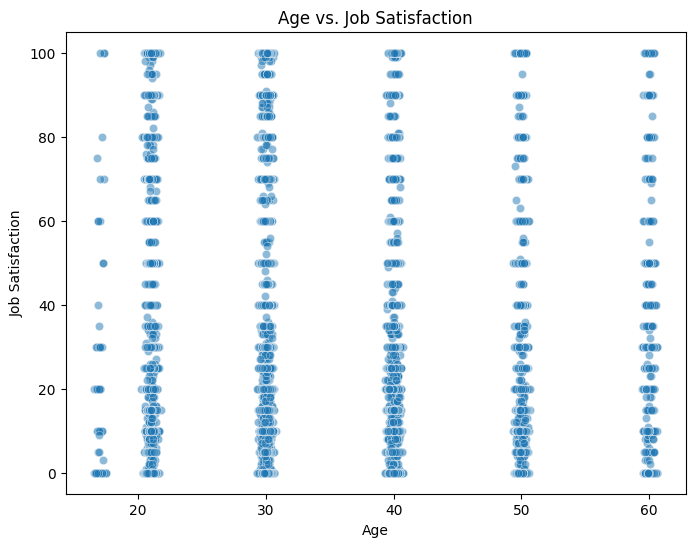

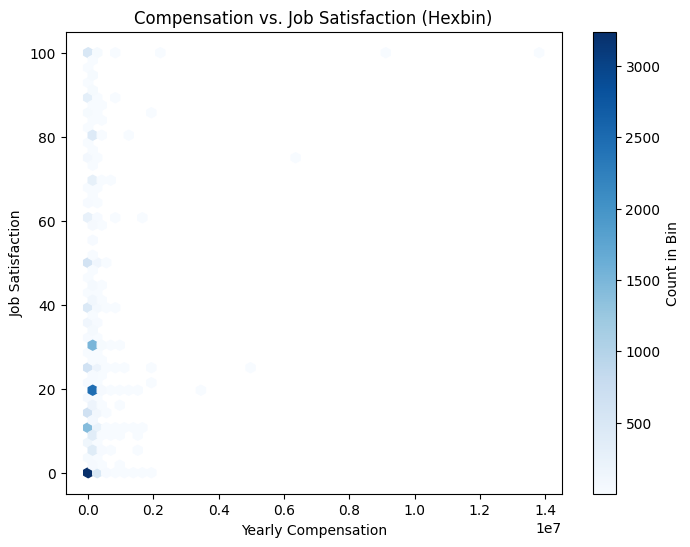

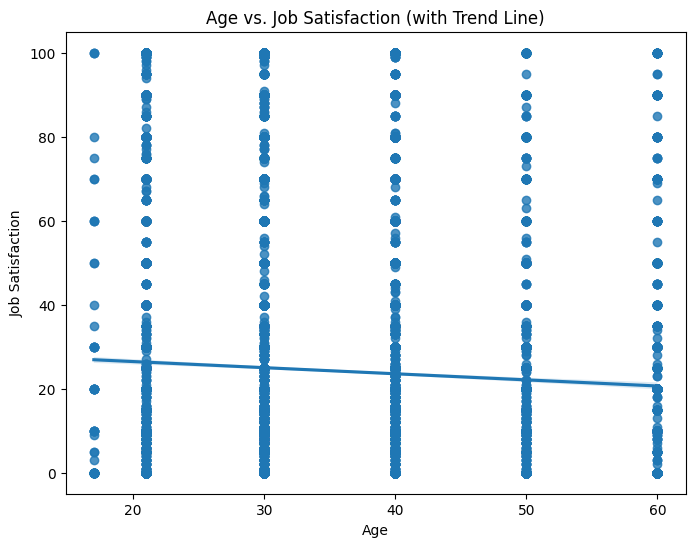

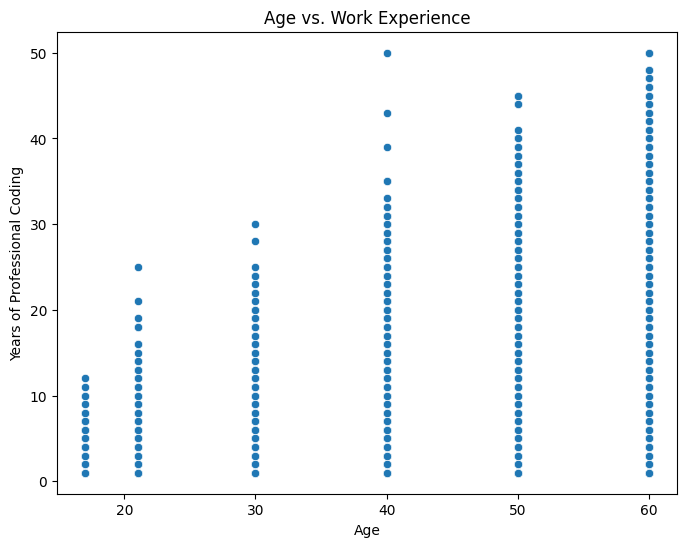

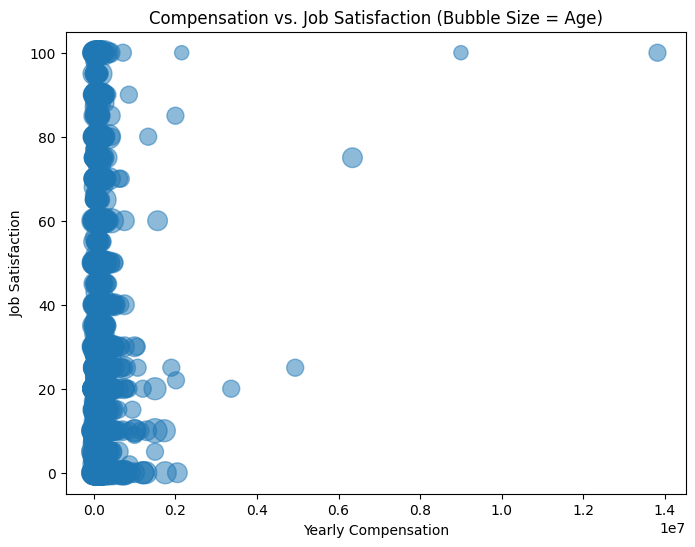

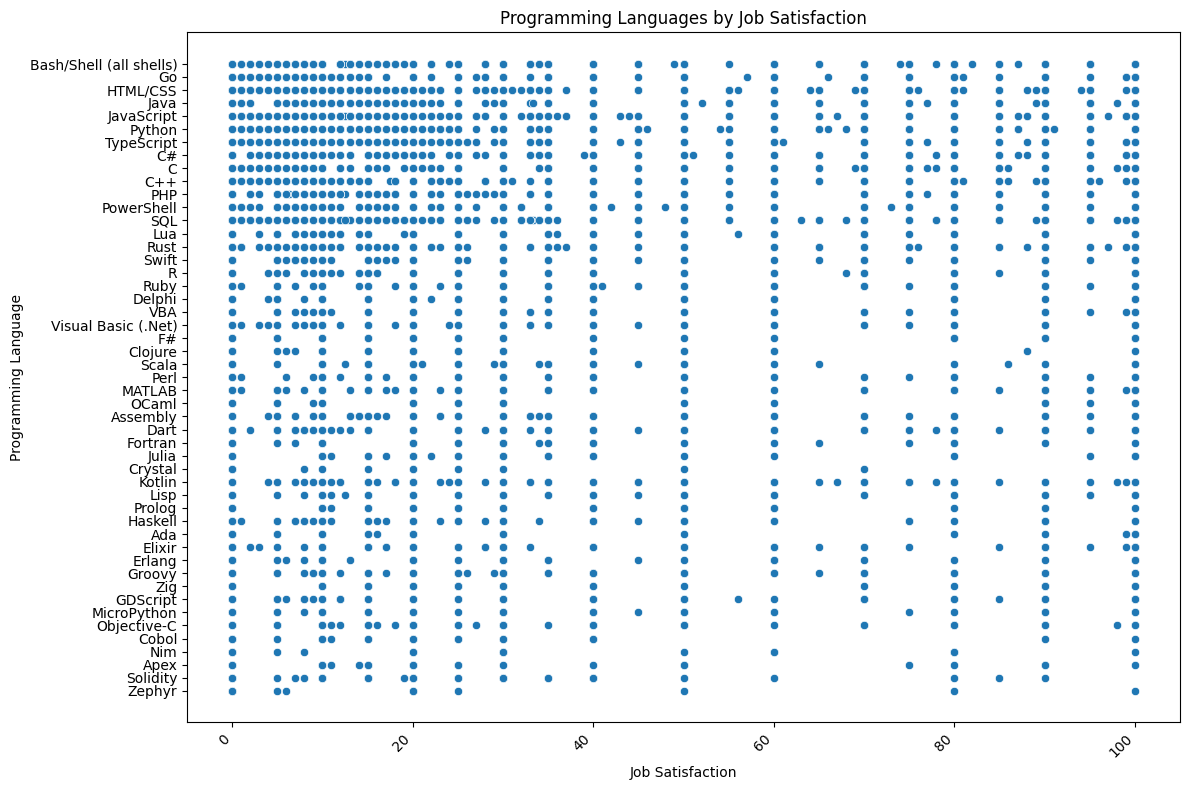

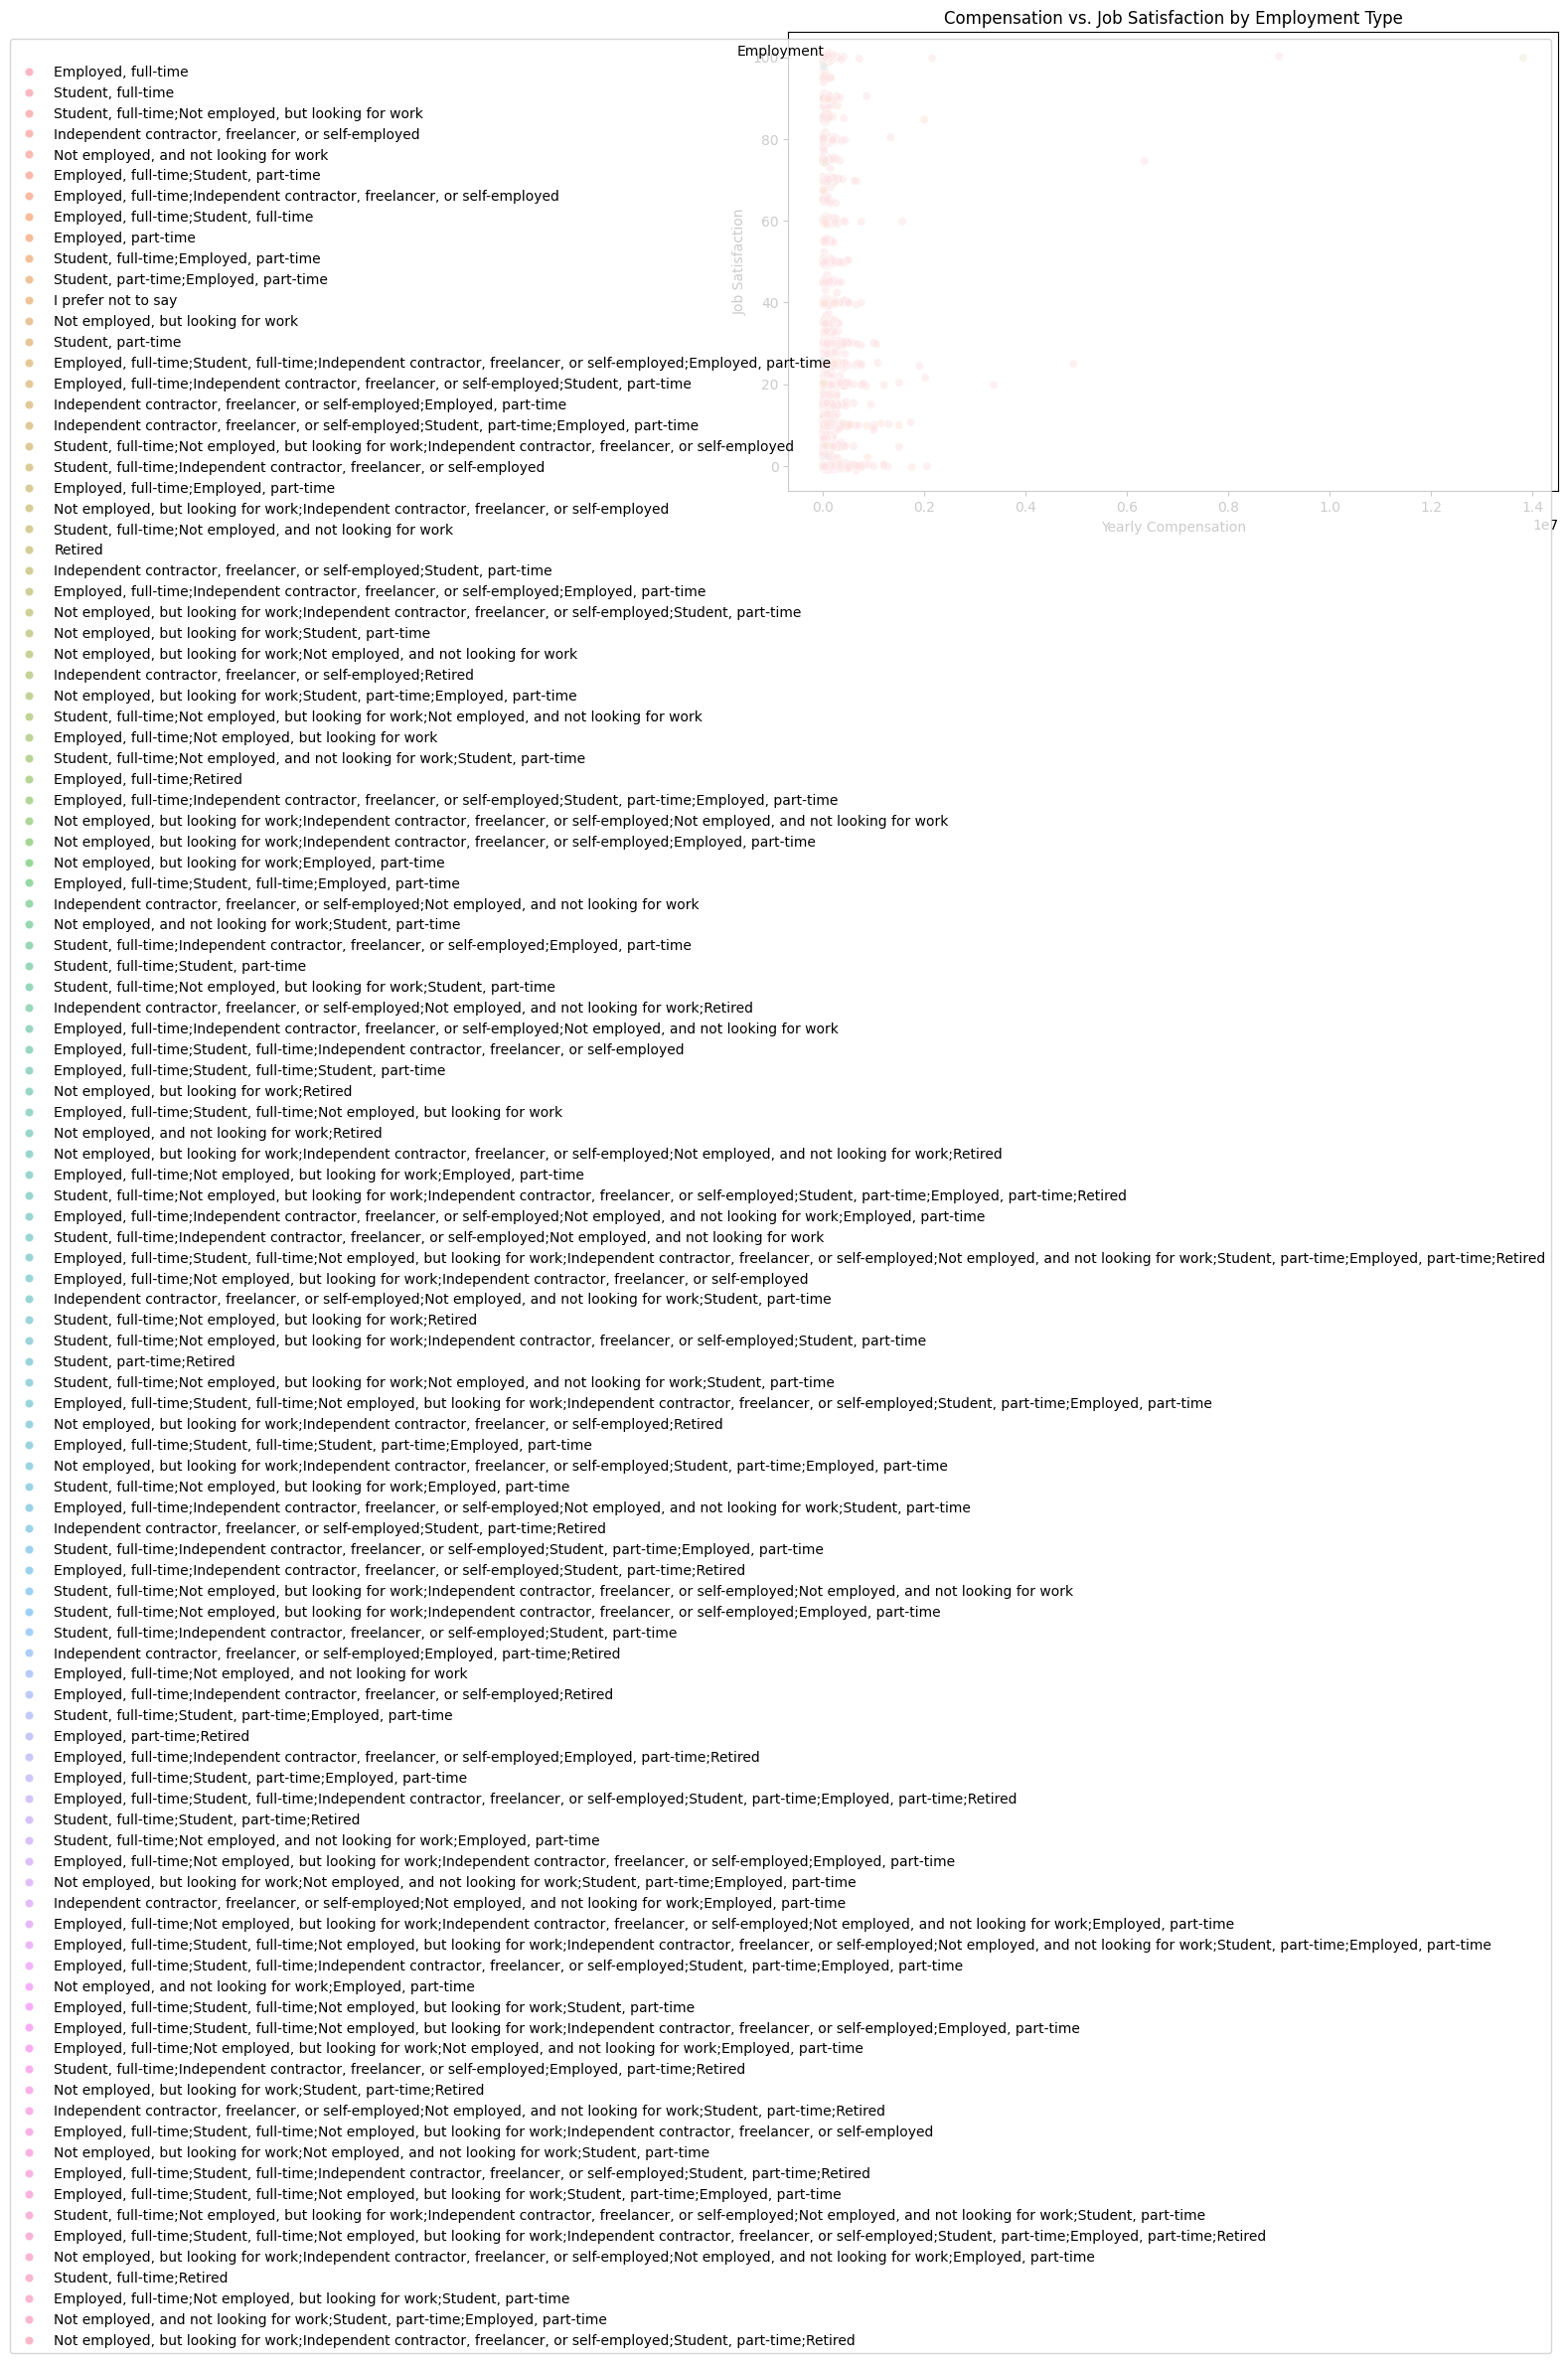

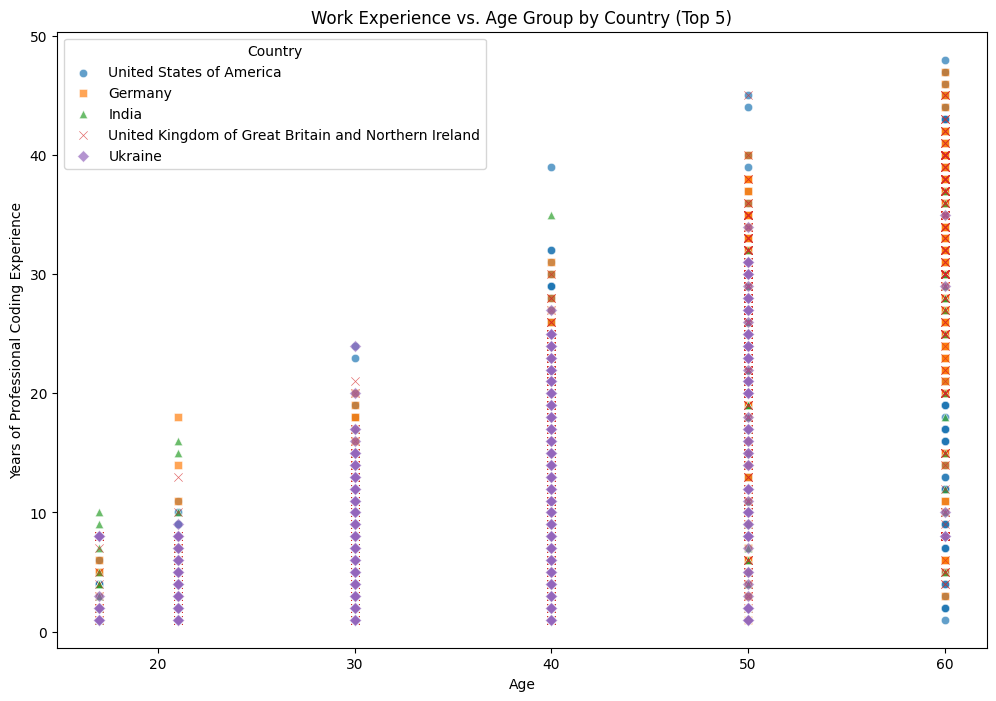

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)



# Converting Age and YearsCodePro to numeric
df['AgeNumeric'] = df['Age'].map({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65-74 years old': 70,
    '75 years or older': 75,
    'Prefer not to say': None
}).astype(float)



df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())


df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')


# Task 1: Exploring Relationships
# 1. Age vs. Job Satisfaction
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='AgeNumeric', y='JobSatPoints_6', data=df)
# plt.title('Age vs. Job Satisfaction')
# plt.xlabel('Age')
# plt.ylabel('Job Satisfaction')
# plt.show()

plt.figure(figsize=(8, 6))

# Apply jittering BEFORE calling sns.scatterplot
x_jittered = df['AgeNumeric'] + np.random.normal(0, 0.2, size=len(df)) # Adjust 0.2 as needed
# sns.scatterplot(x='AgeNumeric', y='JobSatPoints_6', data=df, alpha=0.5, x_jitter=0.2) #Jitter and alpha
sns.scatterplot(x=x_jittered, y='JobSatPoints_6', data=df, alpha=0.5)  # x_jitter removed from here
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

# 2. Compensation vs. Job Satisfaction
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df)
# plt.title('Compensation vs. Job Satisfaction')
# plt.xlabel('Yearly Compensation')
# plt.ylabel('Job Satisfaction')
# plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(df['ConvertedCompYearly'], df['JobSatPoints_6'], gridsize=50, cmap='Blues', mincnt=1)
plt.title('Compensation vs. Job Satisfaction (Hexbin)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
cb = plt.colorbar(label='Count in Bin')
plt.show()

# Task 2: Enhancing Scatter Plots
# 1. Age vs. Job Satisfaction with Trend Line
plt.figure(figsize=(8, 6))
sns.regplot(x='AgeNumeric', y='JobSatPoints_6', data=df) #adds regression line
plt.title('Age vs. Job Satisfaction (with Trend Line)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()


# 2. Age vs. Work Experience
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AgeNumeric', y='YearsCodePro', data=df)
plt.title('Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.show()



# Task 3: Combining Scatter Plots
# 1. Bubble Plot: Compensation vs. Job Satisfaction (Age as Bubble Size)
plt.figure(figsize=(8, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], s=df['AgeNumeric'] * 5, alpha=0.5) # Size by age
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

# 2. Popular Languages vs. Job Satisfaction
# Splitting and exploding LanguageHaveWorkedWith
# languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
# language_satisfaction = df[['JobSatPoints_6']].join(languages, how='right').rename(columns={0: 'Language'})

languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
languages = languages.reset_index(name='Language') #Adding an index to facilitate merge


language_satisfaction = pd.merge(df[['JobSatPoints_6']], languages, left_index=True, right_index=True, how='right')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='JobSatPoints_6', y='Language', data=language_satisfaction)
plt.title('Programming Languages by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Programming Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  #for labels to not overlap
plt.show()



# Task 4: Comparisons Across Groups
# 1. Compensation vs. Job Satisfaction by Employment
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment', data=df)
# plt.title('Compensation vs. Job Satisfaction by Employment Type')
# plt.xlabel('Yearly Compensation')
# plt.ylabel('Job Satisfaction')
# plt.show()

plt.figure(figsize=(10, 6))

jitter_amount = 0.3  # Adjust as needed
y_jittered = df['JobSatPoints_6'] + np.random.normal(0, jitter_amount, size=len(df))
sns.scatterplot(x='ConvertedCompYearly', y=y_jittered, hue='Employment', data=df, alpha=0.5)
#sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment', data=df, alpha=0.5, palette='viridis')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.legend(title='Employment') # add a legend
plt.show()

# 2. Work Experience vs. Age Group by Country (Top 5 countries)
top_countries = df['Country'].value_counts().nlargest(5).index
df_filtered = df[df['Country'].isin(top_countries)]



# plt.figure(figsize=(12, 8))

# for country in top_countries:
#     plt.scatter(df_filtered[df_filtered['Country'] == country]['AgeNumeric'],
#                 df_filtered[df_filtered['Country'] == country]['YearsCodePro'],
#                 label=country, alpha=0.6)

# plt.title('Work Experience vs. Age Group by Country (Top 5)')
# plt.xlabel('Age')
# plt.ylabel('Years of Professional Coding Experience')
# plt.legend(title='Country')
# plt.show()

top_countries = df['Country'].value_counts().nlargest(5).index
df_filtered = df[df['Country'].isin(top_countries)]

markers = ['o', 's', '^', 'x', 'D']  # Different markers for age groups


plt.figure(figsize=(12, 8))

for i, country in enumerate(top_countries):
    sns.scatterplot(x='AgeNumeric', y='YearsCodePro', data=df_filtered[df_filtered['Country'] == country], 
                    label=country, alpha=0.7, marker=markers[i % len(markers)])  # Cycle through markers



plt.title('Work Experience vs. Age Group by Country (Top 5)')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.legend(title='Country')
plt.show()